# Feature selection

 * We decided to keep all feature at first
 * Just removing the not used ones as station id, type of station, sensor number, location X and Y, datetime (because it is transforme in 5 other features with COS and SIN of year position and day position + day number of the week: See data wrangling notebook in data subfolder). 
 
 ### Notes: this is a summary of our conclusions about features selections that were made during model evaluation


In [9]:
import pandas as pd
import numpy as np
from yellowbrick.target import ClassBalance



c:\users\colla\appdata\local\programs\python\python38\lib\site-packages\sklearn\utils\deprecation.py:144: FutureWarning: The sklearn.metrics.classification module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
# Files
data = "eda.csv"
pd.set_option('display.max_columns', None)
df = pd.read_csv(data)

In [7]:
features = df[[
    'population', 
    'dist-mroads', 
    'dist-setl', 
    'dist-coast', 
    'dist-forest', 
    'slope', 
    'elevation', 
    'dayofweek', 
    'sin_day', 
    'cos_day',
    'sin_year', 
    'cos_year', 
    'TEMP', 
    'cos_wind', 
    'sin_wind', 
    'Wind-Rate', 
    'DEW', 
    'SKY', 
    'VIS', 
    'ATM'
]].astype(np.float64)

features.loc[:,'dayofweek'] = features['dayofweek'].astype('category')

labels = df[[
    'pm25',
    'AQI_VALUE', #pm25 transformed using EPA methodology See DATA Wrangling notebook
    'AQI_class'  #pm25 transformed into EPA categorical class  See DATA Wrangling notebook
]]



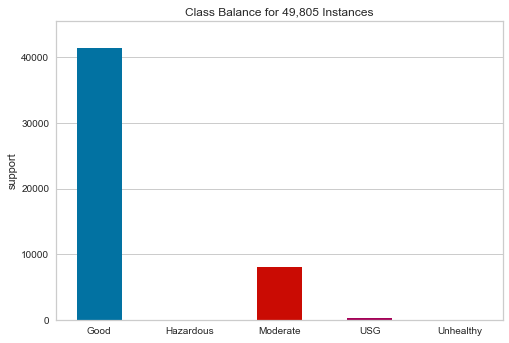

In [10]:
# Instantiate the visualizer
visualizer = ClassBalance(
    #labels=["Good", "USG", "Moderate", "Unhealthy", "Very unhealthy", "Hazardous"], size=(1080, 720)
)

visualizer.fit(df['AQI_class'].values)
visualizer.show()

### Class balance show us that labels are not evently ditributed 

* There is a vast majority of Good air quality
* A few moderate 15/20% and nearby none worse air quality

### We concluded that was a better idea to predict a binary classifyer "Is Air Quality Bad" ?



In [12]:
labels.loc[:,"polluted"] = (labels.loc[:,"AQI_class"] != "Good")

## Dimension reduction

 * X/Y After several iterations of model analysis and discussions with tutors we were told that considering X Y features as sumarizing all location dependant feature was a comonly accepted feature reduction method.
 * It's was simplifying the model and our data product app model by no requiring to retrieve location feature dependent from the user location.
 
 ####We made then a trade of feature X and Y replacing     
 * 'population',     
 * 'dist-mroads',     
 * 'dist-setl',     
 * 'dist-coast', 
 * 'dist-forest', 
 * 'slope', 
 * 'elevation'
 
 
 **So our features became:**


In [ ]:
features = df[[
    'x', 
    'y',
    'dayofweek', 
    'sin_day', 
    'cos_day',
    'sin_year', 
    'cos_year', 
    'TEMP', 
    'cos_wind', 
    'sin_wind', 
    'Wind-Rate', 
    'DEW', 
    'SKY', 
    'VIS', 
    'ATM'
]].astype(np.float64)

features.loc[:,'dayofweek'] = features['dayofweek'].astype('category')

labels = df[[
    'pm25',
    'AQI_VALUE', #pm25 transformed using EPA methodology See DATA Wrangling notebook
    'AQI_class'  #pm25 transformed into EPA categorical class  See DATA Wrangling notebook
]]
labels.loc[:,"polluted"] = (labels.loc[:,"AQI_class"] != "Good")

# Train Test Split Data

* Because we have few locations / stations in our data versus lot of air quality measurements.
* We concluded that was a risk of overfitting the data to train and test the data with same stations and we opted for a randomized groundstations split for testing and training our data

**Using custom method below:**


In [13]:
import random

gs = df[['station_id']]

def tts_gs(X, y, gs, test_size):
    stations = gs["station_id"].unique()
    nb_stations = len(stations) * test_size
    my_randoms = random.sample(list(stations), int(nb_stations))
    filters = gs["station_id"].isin(my_randoms)
    print('Substations selected for testing are : ')
    print(my_randoms)
    return X[~filters], X[filters], y[~filters], y[filters]
